In [1]:
import numpy as np
import pandas as pd
import sklearn as ktl
import pickle
import matplotlib.pylab as plt
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import statsmodels.formula.api as smf

In [2]:
bol = pd.read_csv("/Users/hendrixperalta/Desktop/bolivia/data/GeoDS4Bolivia.csv")
bol = bol.rename(columns={"asdf_id":"id"})
#list(bol.columns)

In [3]:

#list(bol.columns)
#offset = 1000000  
#sat = pd.read_csv("data/egdp/satelite_data.csv")
#sat["lnEGDPpc2012"] = np.log((sat["egdp2012"]/ bol["pop2012"])+offset)
#+offset
#outlier_free["egdppc"] = outlier_free["egdp2012"]/outlier_free["ln_tr400_pop2012"]
#outlier_free["lnegdppc"] = np.log(outlier_free["egdppc"])

#df = pd.merge(bol, sat, on="id", how="outer")


#df["total_land2012"] = df["agr_land2012"] + df["urb_land2012"]
#df["perUrb_land"] = df["urb_land2012"] / df["total_land2012"]
#df["ln_perUrb_land"] = np.log(df["perUrb_land"].fillna(0) + offset)

#df["ln_tr400_pop2012"] = np.log(df["tr400_pop2012"])

#df["ln_pm25_2012"] = np.log(df["pm25_2012"])

#df["ln_land_temp2012"] = np.log(df["land_temp2012"])

In [4]:

#list(bol.columns)
offset = 0.1  
sat = pd.read_csv("data/egdp/satelite_data.csv")
sat["EGDPpc2012"] = (sat["egdp2012"]/ bol["tr400_pop2012"]) +10
sat["lnEGDPpc2012"] = np.log(sat["EGDPpc2012"])
#+offset
#outlier_free["egdppc"] = outlier_free["egdp2012"]/outlier_free["ln_tr400_pop2012"]
#outlier_free["lnegdppc"] = np.log(outlier_free["egdppc"])

df = pd.merge(bol, sat, on="id", how="outer")


df["total_land2012"] = df["agr_land2012"] + df["urb_land2012"]
df["perUrb_land"] = df["urb_land2012"] / df["total_land2012"]
df["ln_perUrb_land"] = np.log(df["perUrb_land"].fillna(0) + offset)

df["ln_tr400_pop2012"] = np.log(df["tr400_pop2012"])

df["ln_pm25_2012"] = np.log(df["pm25_2012"])

df["ln_land_temp2012"] = np.log(df["land_temp2012"])

# **Data exploration**

In [5]:
short_df = df[["imds","ln_t400NTLpc2012", "ln_tr400_pop2012", 'lnEGDPpc2012', 'ln_perUrb_land', 'pm25_2012', 'land_temp2012', "urb_land2012","agr_land2012"]]
short_df.isna().sum()

imds                0
ln_t400NTLpc2012    0
ln_tr400_pop2012    0
lnEGDPpc2012        0
ln_perUrb_land      0
pm25_2012           0
land_temp2012       0
urb_land2012        0
agr_land2012        0
dtype: int64

In [6]:
print(df[["agr_land2012", "urb_land2012"]])

     agr_land2012  urb_land2012
0        0.000000      0.000000
1        0.000000      0.000000
2        0.000000      0.000000
3       50.276154    195.118281
4        0.000000      0.000000
..            ...           ...
334      0.000000      1.254882
335      8.085184      0.000000
336     29.080455      0.000000
337      0.000000    320.778602
338     47.023029     16.002446

[339 rows x 2 columns]


In [7]:
short_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   imds              339 non-null    float64
 1   ln_t400NTLpc2012  339 non-null    float64
 2   ln_tr400_pop2012  339 non-null    float64
 3   lnEGDPpc2012      339 non-null    float64
 4   ln_perUrb_land    339 non-null    float64
 5   pm25_2012         339 non-null    float64
 6   land_temp2012     339 non-null    float64
 7   urb_land2012      339 non-null    float64
 8   agr_land2012      339 non-null    float64
dtypes: float64(9)
memory usage: 24.0 KB


In [8]:
short_df.describe()

,imds,ln_t400NTLpc2012,ln_tr400_pop2012,lnEGDPpc2012,ln_perUrb_land,pm25_2012,land_temp2012,urb_land2012,agr_land2012
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,51.050442,13.033028,9.335445,2.303624,-1.481506,23.561684,297.836346,358.185120,85.317092
std,6.771824,1.671621,1.145385,0.001803,0.961936,6.765622,3.453744,2435.344248,334.547755
min,35.700001,0.856095,6.251161,2.302596,-2.302585,8.257901,287.125211,0.000000,0.000000
25%,47.000000,12.050438,8.686743,2.302771,-2.302585,18.052961,295.856684,0.000000,0.000000
50%,50.500000,13.118243,9.294614,2.302964,-2.302585,21.915591,298.305783,0.000000,5.356337
75%,54.850001,14.268402,9.903637,2.303534,-0.458306,28.731712,300.579665,21.065371,27.980859
max,80.199997,17.071051,14.171911,2.314448,0.095310,38.466365,305.141851,27738.443240,3334.302280


In [9]:
missing_labels = df.columns[df.isna().any()]
missing_labels

Index(['sdg1_1_eepr', 'sdg2_4_pual', 'sdg2_4_td', 'sdg5_5_gpop', 'sdg8_4_rem',
       'sdg9_5_eutf', 'sdg10_2_iec', 'sdg1_1_dtl_abs', 'sdg2_4_apu_abs',
       'sdg2_4_tm_abs', 'sdg3_1_udhf_ab', 'sdg8_4_rem_abs', 'sdg9_5_eutf_abs',
       'ln_NTLpc2012', 'ln_NTLpc2013', 'ln_NTLpc2014', 'ln_NTLpc2015',
       'ln_NTLpc2016', 'ln_NTLpc2017', 'ln_NTLpc2018', 'ln_NTLpc2019',
       'ln_NTLpc2020', 'perUrb_land'],
      dtype='object')

In [10]:
#plt.style.available

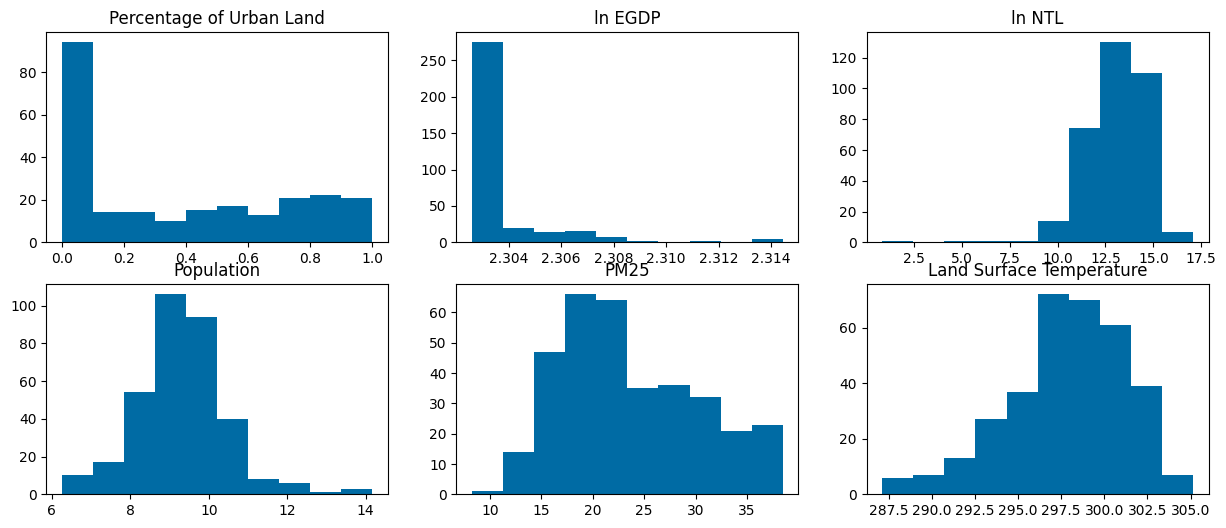

In [11]:
plt.style.use("tableau-colorblind10")

fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(nrows=2,
                                                     ncols=3,
                                                     figsize=(15,6)
                                                     )
ax0.hist(df["perUrb_land"])
ax0.set(title="Percentage of Urban Land")

ax1.hist(df["lnEGDPpc2012"])
ax1.set(title="ln EGDP")

ax2.hist(df["ln_t400NTLpc2012"])
ax2.set(title="ln NTL")

ax3.hist(df["ln_tr400_pop2012"])
ax3.set(title= "Population")

ax4.hist(df["pm25_2012"])
ax4.set(title= "PM25")

ax5.hist(df["land_temp2012"])
ax5.set(title= "Land Surface Temperature");


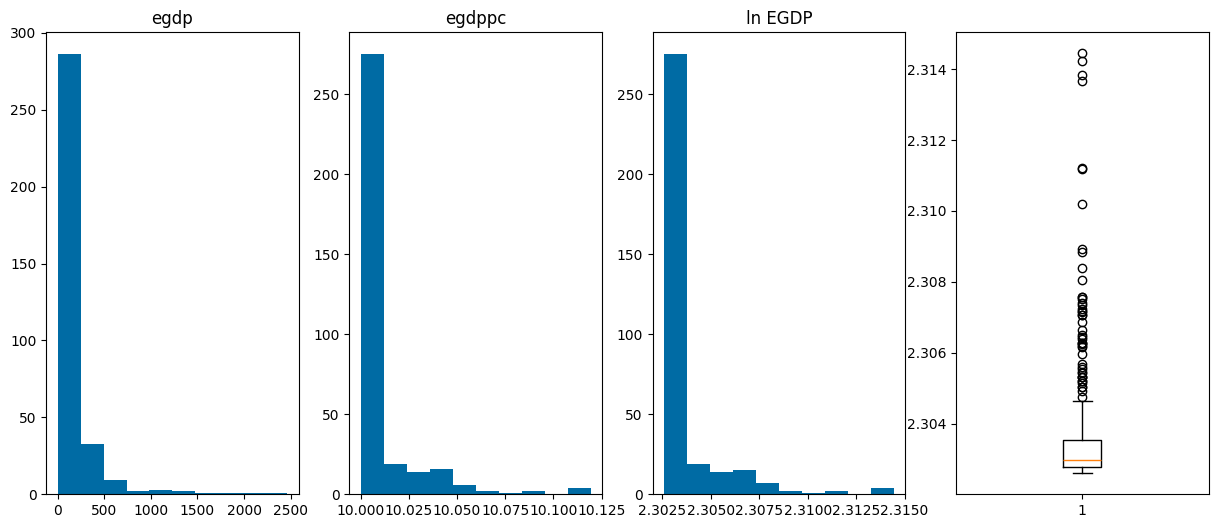

In [12]:
plt.style.use("tableau-colorblind10")

fig, (ax0, ax1, ax2, ax4) = plt.subplots(nrows=1,
                                 ncols=4,
                                 figsize=(15,6)
                                 )
ax0.hist(sat["egdp2012"])
ax0.set(title="egdp")

ax1.hist(df["EGDPpc2012"])
ax1.set(title= "egdppc")

ax2.hist(df["lnEGDPpc2012"])
ax2.set(title="ln EGDP")

ax4.boxplot(df["lnEGDPpc2012"]);


In [13]:
#plt.style.available

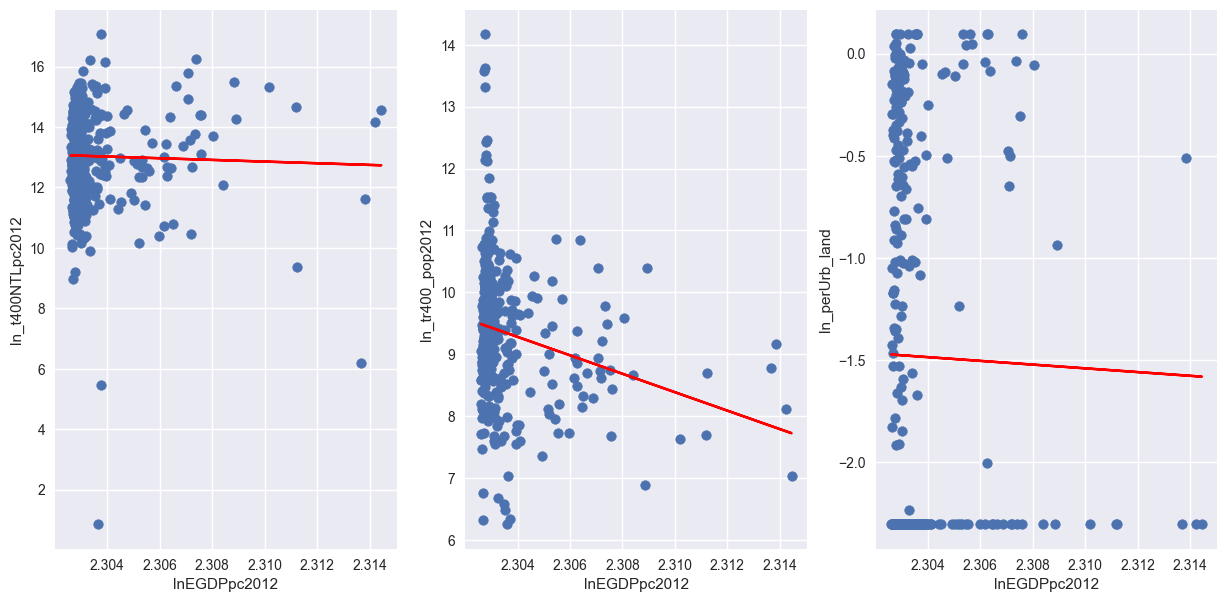

In [14]:
plt.style.use("seaborn-v0_8")

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(15,7))
#----- ax0
ax0.scatter(x=short_df['lnEGDPpc2012'], y=short_df["ln_t400NTLpc2012"])
ax0.set(xlabel="lnEGDPpc2012", ylabel="ln_t400NTLpc2012")

# add trendline
z = np.polyfit(short_df["lnEGDPpc2012"], short_df['ln_t400NTLpc2012'], 1)
p = np.poly1d(z)
ax0.plot(short_df["lnEGDPpc2012"],p(short_df["lnEGDPpc2012"]),"r-")

#----- ax1
ax1.scatter(x=short_df["lnEGDPpc2012"], y=short_df['ln_tr400_pop2012'])
ax1.set(xlabel="lnEGDPpc2012", ylabel="ln_tr400_pop2012")

# add trendline
z = np.polyfit(short_df["lnEGDPpc2012"], short_df['ln_tr400_pop2012'], 1)
p = np.poly1d(z)
ax1.plot(short_df["lnEGDPpc2012"],p(short_df["lnEGDPpc2012"]),"r-")

#----- ax2
ax2.scatter(x=short_df["lnEGDPpc2012"], y=short_df['ln_perUrb_land'])
ax2.set(xlabel="lnEGDPpc2012", ylabel="ln_perUrb_land")

# add trendline
z = np.polyfit(short_df["lnEGDPpc2012"], short_df['ln_perUrb_land'], 1)
p = np.poly1d(z)
ax2.plot(short_df["lnEGDPpc2012"],p(short_df["lnEGDPpc2012"]),"r-")



In [15]:
egdp_ntl = short_df["lnEGDPpc2012"].corr(short_df['ln_t400NTLpc2012'])
egdp_pop = short_df["lnEGDPpc2012"].corr(short_df['ln_tr400_pop2012'])
egdp_urb = short_df["lnEGDPpc2012"].corr(short_df['ln_perUrb_land'])

print(f"Correlation of egdp and ntl: {egdp_ntl}")
print(f"Correlation of egdp and pop: {egdp_pop}")
print(f"Correlation of egdp and Urban land %: {egdp_urb}")

Correlation of egdp and ntl: -0.029803132865402617
Correlation of egdp and pop: -0.23461593927619973
Correlation of egdp and Urban land %: -0.017123750108029703


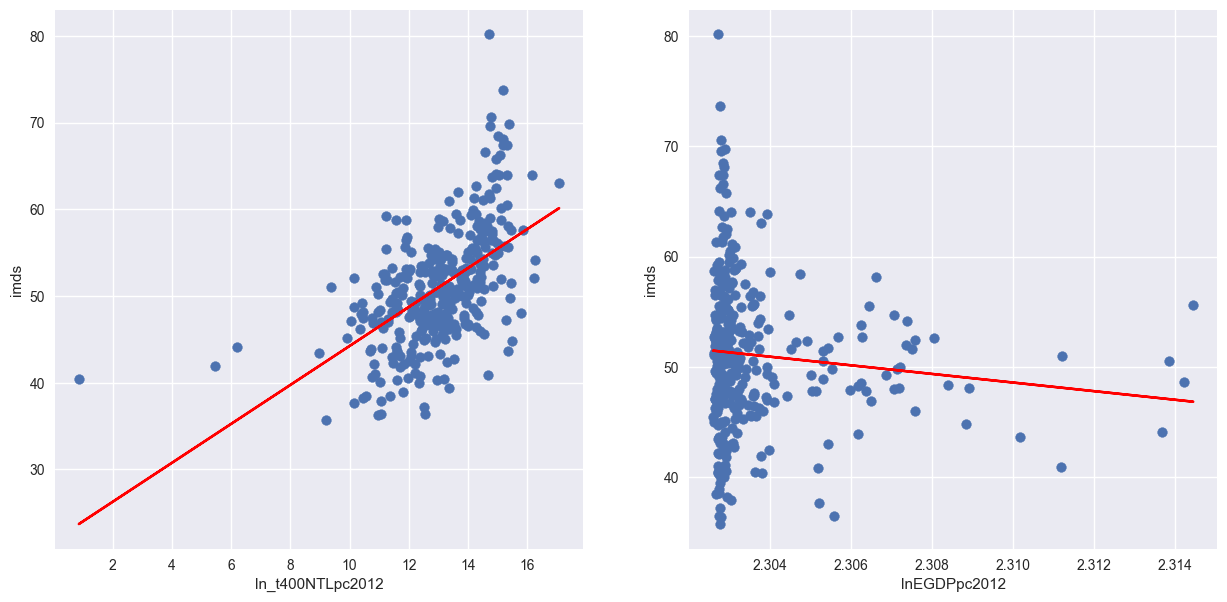

In [16]:

fig, (ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=2,
                                    figsize=(15,7))

#----- ax1
ax1.scatter(x=short_df["ln_t400NTLpc2012"], y=short_df['imds'])
ax1.set(xlabel="ln_t400NTLpc2012", ylabel="imds")

# add trendline
z = np.polyfit(short_df["ln_t400NTLpc2012"], short_df['imds'], 1)
p = np.poly1d(z)
ax1.plot(short_df["ln_t400NTLpc2012"],p(short_df["ln_t400NTLpc2012"]), "r-")

#----- ax2
ax2.scatter(x=short_df["lnEGDPpc2012"], y=short_df['imds'])
ax2.set(xlabel="lnEGDPpc2012", ylabel="imds");

# add trendline
z = np.polyfit(short_df["lnEGDPpc2012"], short_df['imds'], 1)
p = np.poly1d(z)
ax2.plot(short_df["lnEGDPpc2012"], p(short_df["lnEGDPpc2012"]), "r-")

In [17]:
ntl_imds = short_df["ln_t400NTLpc2012"].corr(short_df['imds'])
egdp_imds = short_df["lnEGDPpc2012"].corr(short_df['imds'])

print(f"Correlation of ntl and imds: {ntl_imds}")
print(f"Correlation of egdp and imds: {egdp_imds}")

Correlation of ntl and imds: 0.5548280194761073
Correlation of egdp and imds: -0.10422212148346166


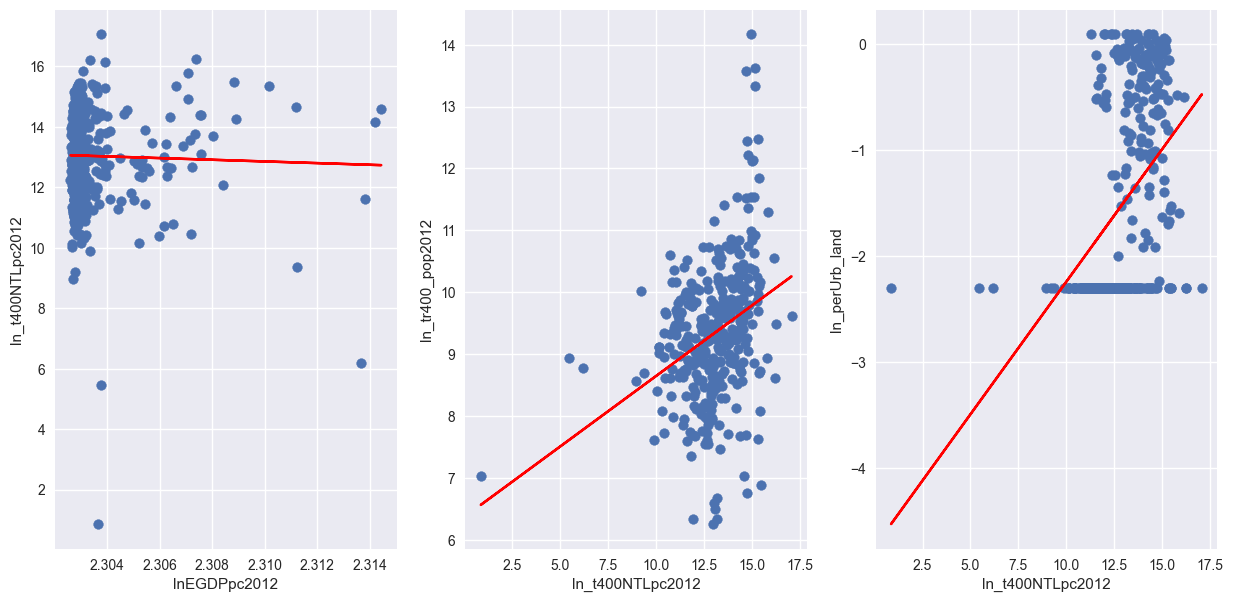

In [18]:
plt.style.use("seaborn-v0_8")

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(15,7))
#----- ax0
ax0.scatter(x=short_df['lnEGDPpc2012'], y=short_df["ln_t400NTLpc2012"])
ax0.set(xlabel="lnEGDPpc2012", ylabel="ln_t400NTLpc2012")

# add trendline
z = np.polyfit(short_df["lnEGDPpc2012"], short_df['ln_t400NTLpc2012'], 1)
p = np.poly1d(z)
ax0.plot(short_df["lnEGDPpc2012"],p(short_df["lnEGDPpc2012"]),"r-")

#----- ax1
ax1.scatter(x=short_df["ln_t400NTLpc2012"], y=short_df['ln_tr400_pop2012'])
ax1.set(xlabel="ln_t400NTLpc2012", ylabel="ln_tr400_pop2012")

# add trendline
z = np.polyfit(short_df["ln_t400NTLpc2012"], short_df['ln_tr400_pop2012'], 1)
p = np.poly1d(z)
ax1.plot(short_df["ln_t400NTLpc2012"],p(short_df["ln_t400NTLpc2012"]),"r-")

#----- ax2
ax2.scatter(x=short_df["ln_t400NTLpc2012"], y=short_df['ln_perUrb_land'])
ax2.set(xlabel="ln_t400NTLpc2012", ylabel="ln_perUrb_land")

# add trendline
z = np.polyfit(short_df["ln_t400NTLpc2012"], short_df['ln_perUrb_land'], 1)
p = np.poly1d(z)
ax2.plot(short_df["ln_t400NTLpc2012"],p(short_df["ln_t400NTLpc2012"]),"r-")



In [19]:
egdp_ntl = short_df["lnEGDPpc2012"].corr(short_df['ln_t400NTLpc2012'])
egdp_pop = short_df["ln_t400NTLpc2012"].corr(short_df['ln_tr400_pop2012'])
egdp_urb = short_df["ln_t400NTLpc2012"].corr(short_df['ln_perUrb_land'])

print(f"Correlation of egdp and ntl: {egdp_ntl}")
print(f"Correlation of egdp and pop: {egdp_pop}")
print(f"Correlation of egdp and Urban land %: {egdp_urb}")

Correlation of egdp and ntl: -0.029803132865402617
Correlation of egdp and pop: 0.3324972344406324
Correlation of egdp and Urban land %: 0.434370118772386


# **Regression models**

### Linear model

In [20]:
x = df[["ln_t400NTLpc2012", "ln_tr400_pop2012", 'lnEGDPpc2012', 'perUrb_land', 'ln_pm25_2012', 'ln_land_temp2012']].fillna(0)
y = df['imds']

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

model = LinearRegression()
model.fit(x_train,y_train)
lr = model.score(x_test, y_test)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print("Mean Squared Error:", mse)
#print("R^2 Score:", r2)

### Ridge  model

In [21]:

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rid_model = linear_model.Ridge()
rid_model.fit(x_train, y_train)
ri = rid_model.score(x_test, y_test)

### Random Forest Regressor model

In [22]:

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf = rf_model.score(x_test, y_test)

### Results 

In [23]:
print("R2 for the regressor models")
print(f" Linear model: {lr*100:.2f}%")
print(f" Ridger model: {ri*100:.2f}%")
print(f" Random Forest model: {rf*100:.2f}%")

R2 for the regressor models
 Linear model: 47.56%
 Ridger model: 47.32%
 Random Forest model: 63.27%


# **Categorical analysis**

In [24]:
quantile_labels = ["low", 'medium-low', 'medium-high', 'high']
df["imds_quantile"] = pd.qcut(df["imds"], q=4, labels=quantile_labels)
#df["imds_quantile"]

In [25]:
x = df[["ln_t400NTLpc2012", "ln_tr400_pop2012", 'lnEGDPpc2012', 'perUrb_land', 'ln_pm25_2012', 'ln_land_temp2012']].fillna(0)
y = df['imds_quantile']

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

clf = RandomForestClassifier()
#clf.get_params()
clf.fit(x_train,y_train);

y_preds = clf.predict(x_test)

#evaluate the model
#print(f" Train data score: {clf.score(x_train, y_train)*100:.2f}%")
print(f" Test data score: {clf.score(x_test, y_test)*100:.2f}%")
rf_cl = clf.score(x_test, y_test)

 Test data score: 42.65%


In [26]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        high       0.63      0.67      0.65        18
         low       0.43      0.67      0.53        15
 medium-high       0.22      0.11      0.15        18
  medium-low       0.29      0.29      0.29        17

    accuracy                           0.43        68
   macro avg       0.40      0.43      0.40        68
weighted avg       0.40      0.43      0.40        68



In [27]:
print(confusion_matrix(y_test, y_preds))

[[12  2  2  2]
 [ 0 10  1  4]
 [ 6  4  2  6]
 [ 1  7  4  5]]


In [28]:
accuracy_score(y_test, y_preds)

0.4264705882352941

In [29]:
# improve model

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} stimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model acurracy is {clf.score(x_test, y_test)*100:.2f}%")

Trying model with 10 stimators
Model acurracy is 41.18%
Trying model with 20 stimators
Model acurracy is 39.71%
Trying model with 30 stimators
Model acurracy is 44.12%
Trying model with 40 stimators
Model acurracy is 45.59%
Trying model with 50 stimators
Model acurracy is 45.59%
Trying model with 60 stimators
Model acurracy is 48.53%
Trying model with 70 stimators
Model acurracy is 45.59%
Trying model with 80 stimators
Model acurracy is 42.65%
Trying model with 90 stimators
Model acurracy is 47.06%


In [30]:
#pickle.dump(clf, open("random_forest_model.pkl", "wb"))

#load_model = pickle.load(open("random_forest_model.pkl", "rb"))
#load_model.score(x_test, y_test)

### Linear SVC Classifier

In [31]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

sgd_cla = svm.LinearSVC(dual="auto", max_iter=10000)
sgd_cla.fit(x_train, y_train)
sgd_cl = sgd_cla.score(x_test, y_test)

### Naive Bayes Classifier

In [32]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

naive_cla = GaussianNB()
naive_cla.fit(x_train, y_train)
naive_cl = naive_cla.score(x_test, y_test)

### Results 

In [33]:
print("R2 for the classifier models")
print(f" Random Forest model: {rf_cl*100:.2f}%")
print(f" Linear SVC model: {sgd_cl*100:.2f}%")
print(f" Naive Bayes model: {naive_cl*100:.2f}%")

R2 for the classifier models
 Random Forest model: 42.65%
 Linear SVC model: 44.12%
 Naive Bayes model: 47.06%


## Iterate regression models

In [34]:
y_variables = list(df.columns)
del y_variables[195:428]
del y_variables[10:13]
del y_variables[0:8]

### Linear Regression

In [35]:
y_variables

['imds',
 'rank_imds',
 'sdg1_1_ubn',
 'sdg1_2_mpi',
 'sdg1_4_abs',
 'sdg2_2_cmc',
 'sdg2_2_oww',
 'sdg2_4_pual',
 'sdg2_4_td',
 'sdg3_1_idca',
 'sdg3_2_imr',
 'sdg3_2_mrc',
 'sdg3_3_cdir',
 'sdg3_3_di',
 'sdg3_3_imr',
 'sdg3_3_ti',
 'sdg3_3_hivi',
 'sdg3_7_afr',
 'sdg4_1_ssdrm',
 'sdg4_1_ssdrf',
 'sdg4_4_phe',
 'sdg4_6_lr',
 'sdg4_c_qti',
 'sdg4_c_qts',
 'sdg5_1_gpsd',
 'sdg5_1_gpyp',
 'sdg5_1_gpmpi',
 'sdg5_5_gpop',
 'sdg6_1_dwc',
 'sdg6_2_sc',
 'sdg6_3_wwt',
 'sdg7_1_ec',
 'sdg7_1_rec',
 'sdg7_1_cce',
 'sdg7_3_co2epc',
 'sdg8_4_rem',
 'sdg8_5_oprm',
 'sdg8_5_ofrm',
 'sdg8_6_mlm',
 'sdg8_6_wlm',
 'sdg8_10_dbb',
 'sdg8_11_idi',
 'sdg9_1_routes',
 'sdg9_5_cd',
 'sdg9_5_eutf',
 'sdg9_c_mnc',
 'sdg9_c_drb',
 'sdg10_2_gcye',
 'sdg10_2_iec',
 'sdg10_2_nssp',
 'sdg11_1_hocr',
 'sdg11_1_hno',
 'sdg11_2_samt',
 'sdg13_1_ccvi',
 'sdg13_2_tco2e',
 'sdg13_2_dra',
 'sdg15_1_pa',
 'sdg15_5_blr',
 'sdg16_1_rhr',
 'sdg16_6_pbec',
 'sdg16_9_cr',
 'sdg17_1_pmtax',
 'sdg17_5_pipc',
 'sdg1_1_dtl_abs',
 

In [36]:
xs = [ "ln_t400NTLpc2012", "ln_tr400_pop2012", 'lnEGDPpc2012', 'ln_perUrb_land','ln_pm25_2012', 'land_temp2012']
for x in xs:
    df.fillna({x:0}, inplace=True)

In [37]:
model_results = {}

for y_variable in y_variables:
    filtered_df = df.dropna()

    x = filtered_df[[ "ln_t400NTLpc2012", "ln_tr400_pop2012", 'lnEGDPpc2012', 'ln_perUrb_land', 'ln_pm25_2012', 'ln_land_temp2012']]
    y = filtered_df[y_variable]

    np.random.seed(42)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

    model = LinearRegression()
    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[y_variable] = r2

res_90 = {key: value for key, value in model_results.items() if value > 0.9}
res_80 = {key: value for key, value in model_results.items() if (value > 0.8 and value < 0.9)}
res_70 = {key: value for key, value in model_results.items() if (value > 0.7 and value < 0.8)}

res_neg = {key: value for key, value in model_results.items() if value < 0}

#    print(f"For the variable {y_variable} Mean Squared Error:", mse)
#    print("R^2 Score:", r2)


In [38]:
res_90

{}

In [39]:
res_80

{}

In [40]:
res_70

{}

In [41]:
res_neg

{'sdg2_4_pual': -0.49497716463683217,
 'sdg3_2_imr': -0.20266971699106984,
 'sdg3_2_mrc': -0.2169636315857968,
 'sdg3_3_cdir': -0.062036595942349226,
 'sdg3_3_di': -2.074322598152817,
 'sdg3_3_ti': -0.01577241903564075,
 'sdg5_1_gpmpi': -0.03592186620115467,
 'sdg6_2_sc': -0.24793029670365097,
 'sdg6_3_wwt': -0.16856040643715597,
 'sdg8_6_mlm': -0.32697328069468123,
 'sdg8_6_wlm': -0.18238240556064045,
 'sdg8_10_dbb': -0.028588850986737135,
 'sdg15_1_pa': -0.07121315810200102,
 'sdg16_1_rhr': -0.1098807101460042,
 'sdg17_5_pipc': -0.06945878969440922,
 'sdg2_2_cm_abs': -0.07411570018494862,
 'sdg2_4_apu_abs': -2.278406807717132,
 'sdg2_4_tm_abs': -0.13928086368973447,
 'sdg3_1_udhf_ab': -0.03955853877124915,
 'sdg3_3_pd_abs': -5.416757911547375,
 'sdg4_4_heu_abs': -0.2165517827719432,
 'sdg6_1_wdc_abs': -0.5661900234102215,
 'sdg7_1_wec_abs': -0.4373724065674711,
 'sdg8_10_dbb_abs': -0.03835017826949216,
 'sdg9_5_kcd_abs': -0.7644705229662687,
 'sdg10_2_dss_abs': -0.12201323564641853,


### Random Forest Regressor

In [42]:
model_results = {}

for y_variable in y_variables:
    filtered_df = df.dropna()

    x = filtered_df[[ "ln_t400NTLpc2012", "ln_tr400_pop2012", 'lnEGDPpc2012', 'ln_perUrb_land',  "ln_pm25_2012", "ln_land_temp2012"]].fillna(0)
    y = filtered_df[y_variable]

    np.random.seed(42)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) 

    model = RandomForestRegressor()
    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[y_variable] = r2

res_90 = {key: value for key, value in model_results.items() if value > 0.9}
res_80 = {key: value for key, value in model_results.items() if (value > 0.8 and value < 0.9)}
res_70 = {key: value for key, value in model_results.items() if (value > 0.7 and value < 0.8)}

res_neg = {key: value for key, value in model_results.items() if value < 0}

#    print(f"For the variable {y_variable} Mean Squared Error:", mse)
#    print("R^2 Score:", r2)


In [43]:
res_90

{'sdg8_5_ompr_abs': 0.9502136052439594,
 'sdg8_5_ofpr_abs': 0.9740938528329316,
 'sdg8_6_wlm_abs': 0.917855369838197}

In [44]:
res_80

{'sdg1_1_dtl_abs': 0.808469812163995,
 'sdg2_2_wow_abs': 0.8111842247819953,
 'sdg3_7_bpw_abs': 0.8363692019726078,
 'sdg4_1_mhs_abs': 0.8000653306722771,
 'sdg11_1_ho_abs': 0.8250807588074137,
 'sdg16_6_aob_abs': 0.8863493302228604}

In [45]:
res_70

{'sdg1_1_pubn_abs': 0.742840915812065,
 'sdg3_3_vih_abs': 0.7225879671768608,
 'sdg4_1_fhs_abs': 0.7925208052321902,
 'sdg4_4_heu_abs': 0.700710032213675,
 'sdg17_5_tpi_abs': 0.7153068523495469}

In [46]:
res_neg 

{'sdg3_2_imr': -0.22398693056310703,
 'sdg3_2_mrc': -0.24584894545178382,
 'sdg3_3_di': -43.247599127760395,
 'sdg3_3_imr': -0.07797700616469139,
 'sdg3_3_ti': -0.1975218504398566,
 'sdg3_3_hivi': -0.5397411001999681,
 'sdg4_c_qts': -0.006090948906231741,
 'sdg5_1_gpsd': -0.19150993692552842,
 'sdg6_1_dwc': -0.046162004548592206,
 'sdg6_2_sc': -0.33834658131193773,
 'sdg6_3_wwt': -0.5611384127387953,
 'sdg7_3_co2epc': -1.40347919703364,
 'sdg8_10_dbb': -0.258382894402023,
 'sdg9_1_routes': -0.10388830548926009,
 'sdg9_5_cd': -0.015981913220802335,
 'sdg15_5_blr': -0.017431543310953534,
 'sdg1_2_dd_abs': -0.15445296164684663,
 'sdg2_4_apu_abs': -0.87538196869296,
 'sdg2_4_tm_abs': -0.11703487669394796,
 'sdg3_3_pd_abs': -70.42113784610899,
 'sdg3_3_mc_abs': -0.3367683115037192,
 'sdg6_1_wdc_abs': -1.8173594807437392,
 'sdg7_1_wec_abs': -0.5831443456319756,
 'sdg9_1_rmun_abs': -0.10388830548926009,
 'sdg10_2_dss_abs': -0.019577679473551157,
 'sdg13_2_tco2_abs': -0.6295146202355093,
 'sdg

In [47]:
#y_variables.index('perUrb_land')

## Getting data ready

2. handling missing values
3. converting non-num in to num variables (encoding)

In [48]:
df.to_csv("Try_on_GEoda.csv")

In [49]:
outlier_free = pd.read_csv("Try_on_GEoda.csv")

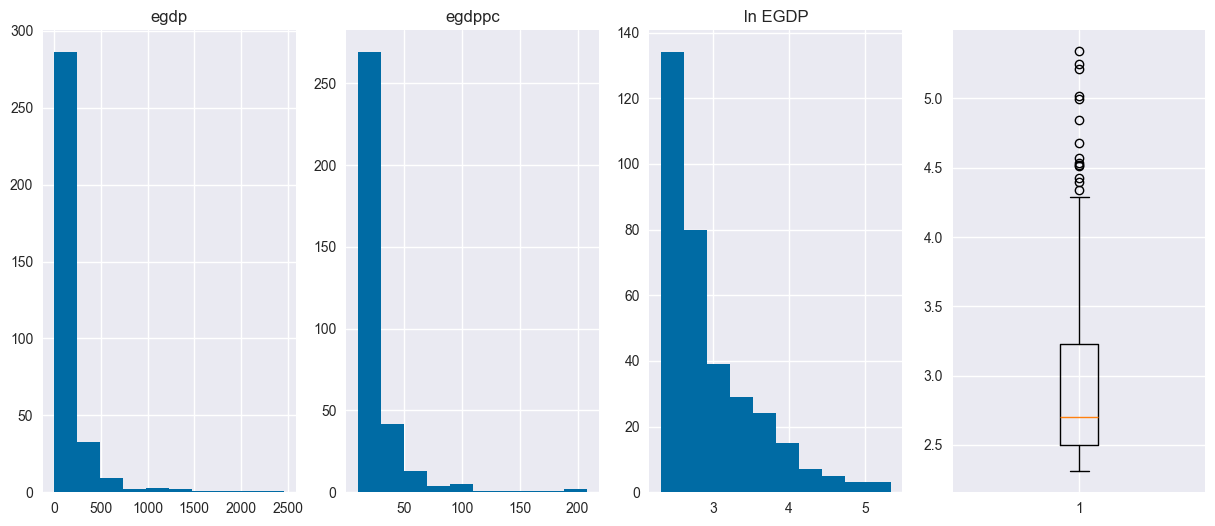

In [50]:
plt.style.use("tableau-colorblind10")

fig, (ax0, ax1, ax2, ax4) = plt.subplots(nrows=1,
                                 ncols=4,
                                 figsize=(15,6)
                                 )
ax0.hist(outlier_free["egdp2012"])
ax0.set(title="egdp")

outlier_free["egdppc"] = (outlier_free["egdp2012"]/outlier_free["ln_tr400_pop2012"]) + 10
outlier_free["lnegdppc"] = np.log(outlier_free["egdppc"])

ax1.hist(outlier_free["egdppc"])
ax1.set(title= "egdppc")

ax2.hist(outlier_free["lnegdppc"])
ax2.set(title="ln EGDP")

ax4.boxplot(outlier_free["lnegdppc"]);


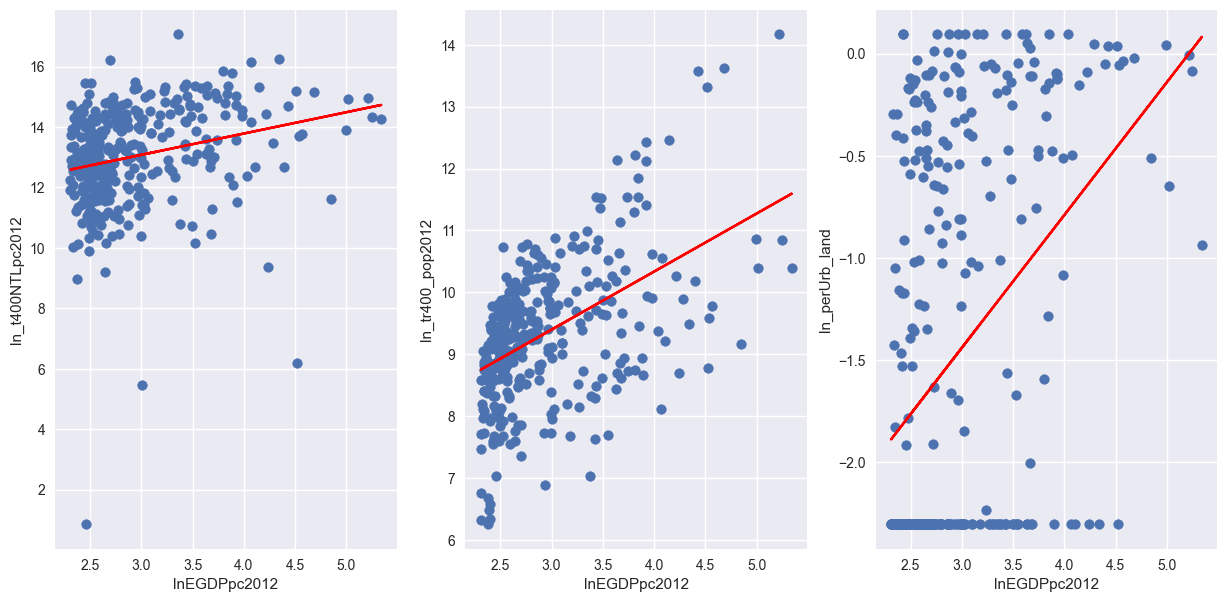

In [51]:
plt.style.use("seaborn-v0_8")

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(15,7))
#----- ax0
ax0.scatter(x=outlier_free["lnegdppc"], y=outlier_free["ln_t400NTLpc2012"])
ax0.set(xlabel="lnEGDPpc2012", ylabel="ln_t400NTLpc2012")

# add trendline
z = np.polyfit(outlier_free["lnegdppc"], outlier_free['ln_t400NTLpc2012'], 1)
p = np.poly1d(z)
ax0.plot(outlier_free["lnegdppc"],p(outlier_free["lnegdppc"]),"r-")

#----- ax1
ax1.scatter(x=outlier_free["lnegdppc"], y=outlier_free['ln_tr400_pop2012'])
ax1.set(xlabel="lnEGDPpc2012", ylabel="ln_tr400_pop2012")

# add trendline
z = np.polyfit(outlier_free["lnegdppc"], outlier_free['ln_tr400_pop2012'], 1)
p = np.poly1d(z)
ax1.plot(outlier_free["lnegdppc"],p(outlier_free["lnegdppc"]),"r-")

#----- ax2
ax2.scatter(x=outlier_free["lnegdppc"], y=outlier_free['ln_perUrb_land'])
ax2.set(xlabel="lnEGDPpc2012", ylabel="ln_perUrb_land")

# add trendline
z = np.polyfit(outlier_free["lnegdppc"], outlier_free['ln_perUrb_land'], 1)
p = np.poly1d(z)
ax2.plot(outlier_free["lnegdppc"],p(outlier_free["lnegdppc"]),"r-")



In [52]:
egdp_ntl = outlier_free["lnegdppc"].corr(outlier_free['ln_t400NTLpc2012'])
egdp_pop = outlier_free["lnegdppc"].corr(outlier_free['ln_tr400_pop2012'])
egdp_urb = outlier_free["lnegdppc"].corr(outlier_free['ln_perUrb_land'])

print(f"Correlation of egdp and ntl: {egdp_ntl}")
print(f"Correlation of egdp and pop: {egdp_pop}")
print(f"Correlation of egdp and Urban land %: {egdp_urb}")

Correlation of egdp and ntl: 0.2554662539632393
Correlation of egdp and pop: 0.4958835371913518
Correlation of egdp and Urban land %: 0.40895293528306675


In [53]:
outlier_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Columns: 431 entries, Unnamed: 0.1 to lnegdppc
dtypes: float64(367), int64(58), object(6)
memory usage: 1.1+ MB


In [54]:
mod = smf.ols("imds ~ lnegdppc", data=outlier_free)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   imds   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     33.66
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.51e-08
Time:                        01:16:54   Log-Likelihood:                -1112.8
No. Observations:                 339   AIC:                             2230.
Df Residuals:                     337   BIC:                             2237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1555      1.741     23.635      0.0

In [55]:
mod = smf.ols("imds ~ lnEGDPpc2012", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   imds   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.701
Date:                Thu, 13 Jun 2024   Prob (F-statistic):             0.0552
Time:                        01:16:54   Log-Likelihood:                -1127.1
No. Observations:                 339   AIC:                             2258.
Df Residuals:                     337   BIC:                             2266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      952.7640    468.729      2.033   